In [2]:
import numpy as np
import pandas as pd
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
dual_channel = True
audio = np.fromfile("D:mic_data", dtype = np.int16)
if dual_channel:
    audio = np.array([audio[::2], audio[1::2]])
print(audio.shape)
Audio(data= 20 * audio, rate=41667)

(2, 524288)


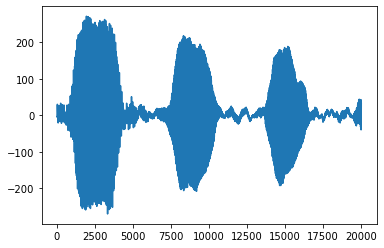

In [73]:
plt.plot(range(len(audio[1][80000:100000])), audio[1][80000:100000])

In [53]:
3839 - 7935

-4096

In [61]:
arr = np.where(audio[0][80000:100000] == 0)[0]
for i in range(len(arr)):
    if abs(arr[i+1] - arr[i]) != 1:
        print(i)

3839
3841
3842
3846
3848
3849
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3865
3866
3870
3871
3872
3873
3874
3875
3876
3877
3878
3880
3881
3882
3883
3884
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3900
3903
3904
3905
3906
3907
3909
3912
3913
3914
3915
3916
3917
3918
3919
3923
3924
3925
3926
3929
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3945
3946
3947
3948
3949
3950
3951
3952
3955
3958
3960
3961
3963
3965
3967
3968
3970
3971
3972
3974
3975
3976
3977
3978
3979
3980
3981
3984
3986
3987
3990
3992
3993
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4009
4013
4015
4018
4020
4021
4022
4023
4025
4026
4027
4028
4029
4031
4036
4037
4038
4039
4040
4042
4043
4044
4047
4048
4049
8145
8146
8147
8148
8149
8152
8153
8154
8156
8157
8158
8159
8160
8161
8163
8164
8165
8166
8169
8171
8172
8173
8174
8175
8177
8178
8183
8184
8185
8187
8189
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8209
8211
8212
8216
8219
8220
8221
8222
8223
8224
8225


IndexError: index 12332 is out of bounds for axis 0 with size 12332

In [ ]:
# bluetooth streaming
# bridge microphone on nose
# use loudspeakers instead of bone conduction ones
# heartbeat and blood pressure

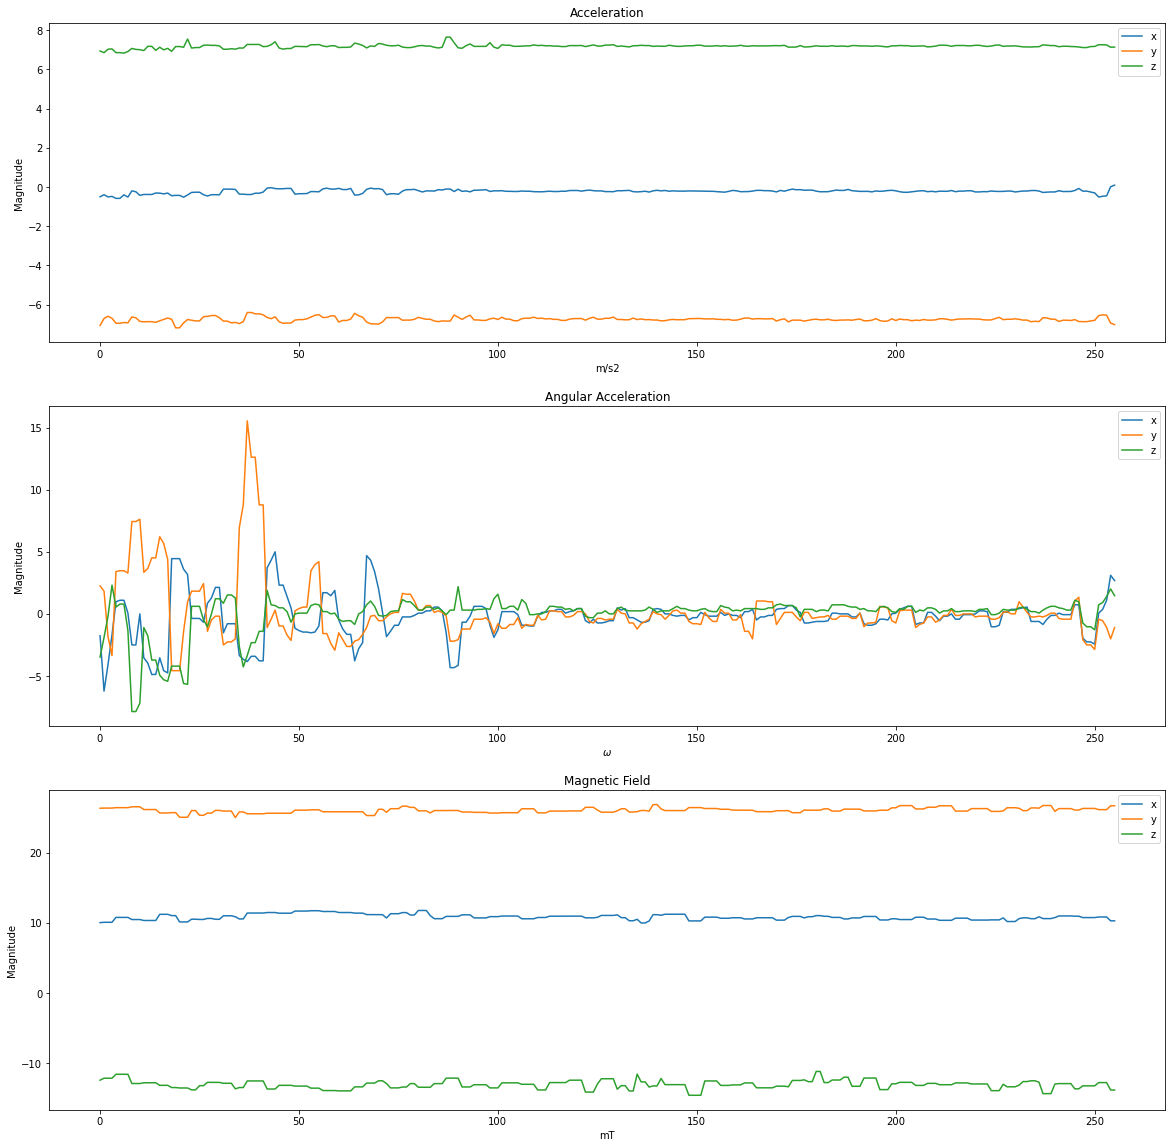

In [10]:
imu = np.fromfile("D:IMU_DATA", dtype = np.float32)
acc = {
    'x' : imu[::9],
    'y' : imu[1::9],
    'z' : imu[2::9]
}

ang = {
    'x' : imu[3::9],
    'y' : imu[4::9],
    'z' : imu[5::9]
}

mag = {
    'x' : imu[6::9],
    'y' : imu[7::9],
    'z' : imu[8::9]
}

plt.figure(figsize = (20, 20))

plt.subplot(311)
plt.title('Acceleration')
plt.xlabel('m/s2')
plt.ylabel('Magnitude')
for ax in acc:
    plt.plot(range(len(acc[ax])), acc[ax] * 9.8, label = ax)
plt.legend()
    
plt.subplot(312)
plt.title('Angular Acceleration')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
for ax in acc:
    plt.plot(range(len(ang[ax])), ang[ax], label = ax)
plt.legend()
    
plt.subplot(313)
plt.title('Magnetic Field')
plt.xlabel('mT')
plt.ylabel('Magnitude')
for ax in acc:
    plt.plot(range(len(mag[ax])), mag[ax], label = ax)
plt.legend()

In [4]:
np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])[1::2]

array([1, 3, 5, 7, 9])

C:\Users\Eric\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Magnitude')

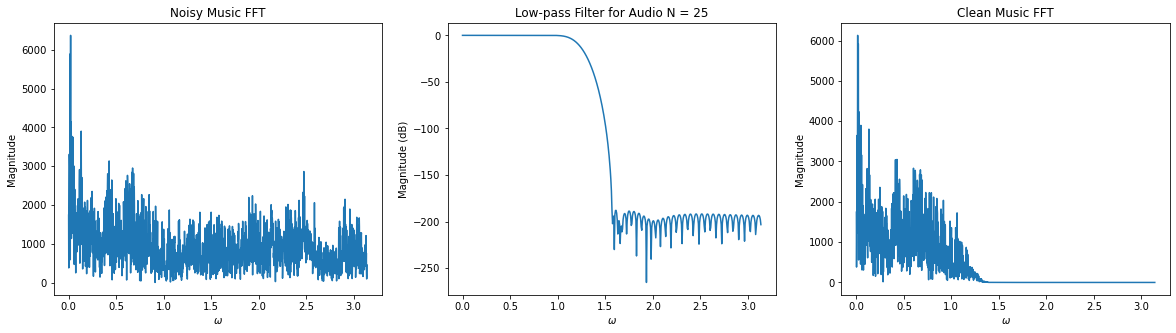

In [77]:
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

a_audio = [1,0]
lpf_bands_audio = [0,0.25,0.50,1]
lpf_desired_audio = [1,0]

afft = np.fft.rfft(audio)
plt.figure(figsize = (20, 5))
plt.subplot(131)
plt.plot(np.linspace(0, np.pi, len(afft)), np.abs(afft))
plt.title('Noisy Music FFT')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')

lpf_audio_a = signal.remez(100,lpf_bands_audio,lpf_desired_audio,fs=2)
w_audio,lpf_audio = signal.freqz(lpf_audio_a, a_audio)
plt.subplot(132)
plt.plot(w_audio,sig2db(lpf_audio))
plt.title('Low-pass Filter for Audio N = 25')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude (dB)')

audio_filtered = signal.convolve(lpf_audio_a,audio)
audio_filtered_fft = np.fft.rfft(audio_filtered)
plt.subplot(133)
plt.plot(np.linspace(0, np.pi, len(audio_filtered_fft)), np.abs(audio_filtered_fft))
plt.title('Clean Music FFT')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')

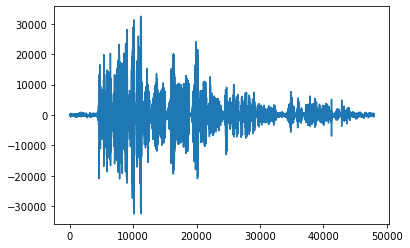

In [79]:
audio_filtered = np.array(mic_data['-2'])[150:].astype(np.int16)
plt.figure()
plt.plot(range(len(audio_filtered)), audio_filtered * 50)

In [87]:
Audio(data= 50 * audio_filtered.astype(np.int16), rate=2000)